### PASO 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv(r'C:/Users/Usuario/OneDrive/TripleTen/SPRINTS/MODULO 1/games.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### PASO 2

In [2]:
# se arreglan los datos, convirtiendo a minúsculas, a números, se eliminan columnas 
df.columns = df.columns.str.lower()
df['year_of_release'] = pd.to_numeric(df['year_of_release'].replace('tbd', None), errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'].replace('tbd', None), errors='coerce')

df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

df['year_of_release'] = df['year_of_release'].astype(int)

#se agrega una nueva columna para poder analizar los datos de totales de ventas
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.info()
df.isna().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Conversión de tipos de datos y explicación del porqué se eliminaron los valores nulos

En esta etapa de preparación de datos, se realizaron conversiones en las siguientes columnas para asegurar que los valores estuvieran en un formato numérico adecuado para el análisis:

- **`year_of_release`**:  
  Se encontraba como tipo `float64`, pero al reresentar un año, se optó por convertirlo a `int`.  
  Previamente se convirtió a formato numérico con `pd.to_numeric()` usando `errors='coerce'` para manejar valores no válidos (por ejemplo, cadenas vacías), que fueron transformados en `NaN`. Después se eliminaron los valores faltantes y finalmente se convirtió a tipo entero.

- **`user_score`**:  
  Originalmente tenía valores tipo `object`, ya que incluía cadenas como `'tbd'` (to be determined), que no representan puntuaciones reales.  
  Se reemplazó `'tbd'` por `None` y luego se usó `pd.to_numeric()` con `errors='coerce'` para convertirla a `float64`. Esto permite realizar análisis numérico y estadístico sobre esta columna.

Estas conversiones son fundamentales para que los datos sean compatibles y suseptibles de operaciones matemáticas, agrupamientos, visualizaciones y pruebas estadísticas que se tendrán que realizar más adelante.

Se eliminaron los valores nulos en las columnas `name`, `genre` y `year_of_release` porque contienen información **necesaria para el análisis**:

- `name`: Sin el nombre del juego, no es posible identificar o analizarlo correctamente.
- `genre`: El género es indispensable para evaluar patrones de venta y preferencias por tipo de juego.
- `year_of_release`: Este dato es necesario para analizar tendencias a lo largo del tiempo y segmentar el período relevante objeto de análisis.

Dado que los valores nulos en estas columnas representan solamente una **proporción pequeña del total** de los datos y no pueden ser llenados por mi, se optó por **eliminarlos** para mantener la calidad y la coherencia del análisis.


### PASO 3

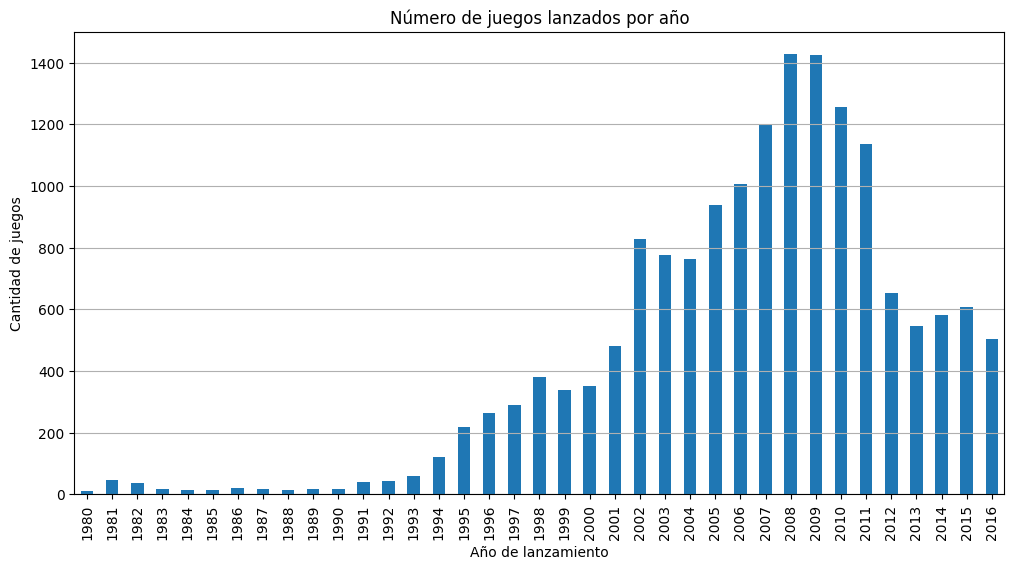

In [3]:
# se grafica por juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.grid(axis='y')
plt.show()

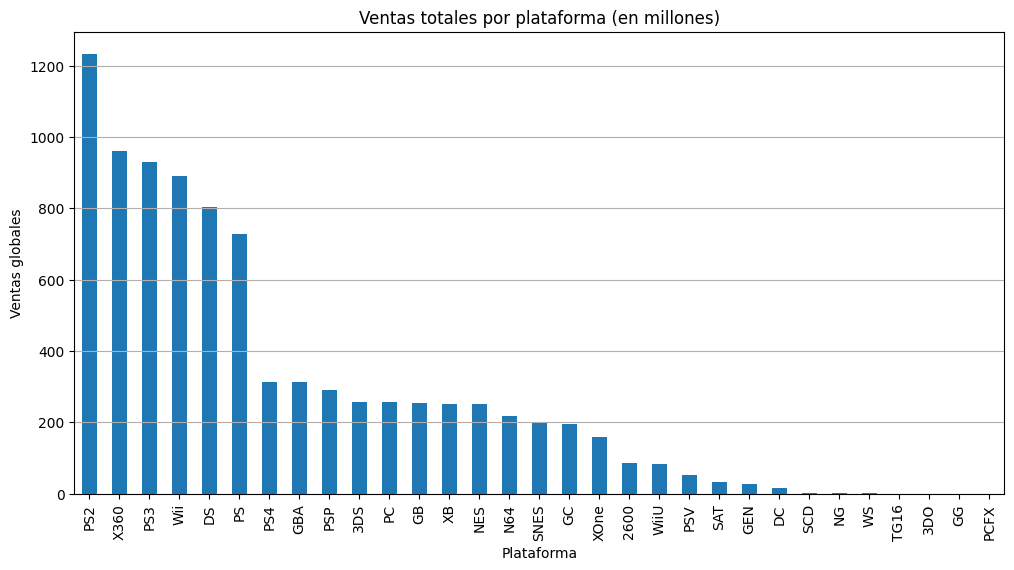

platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980             11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981             35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1982             28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1983              5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1984              0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1985              0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
1986              0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1987              1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1988              0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
1989              0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   
1990               NaN   NaN

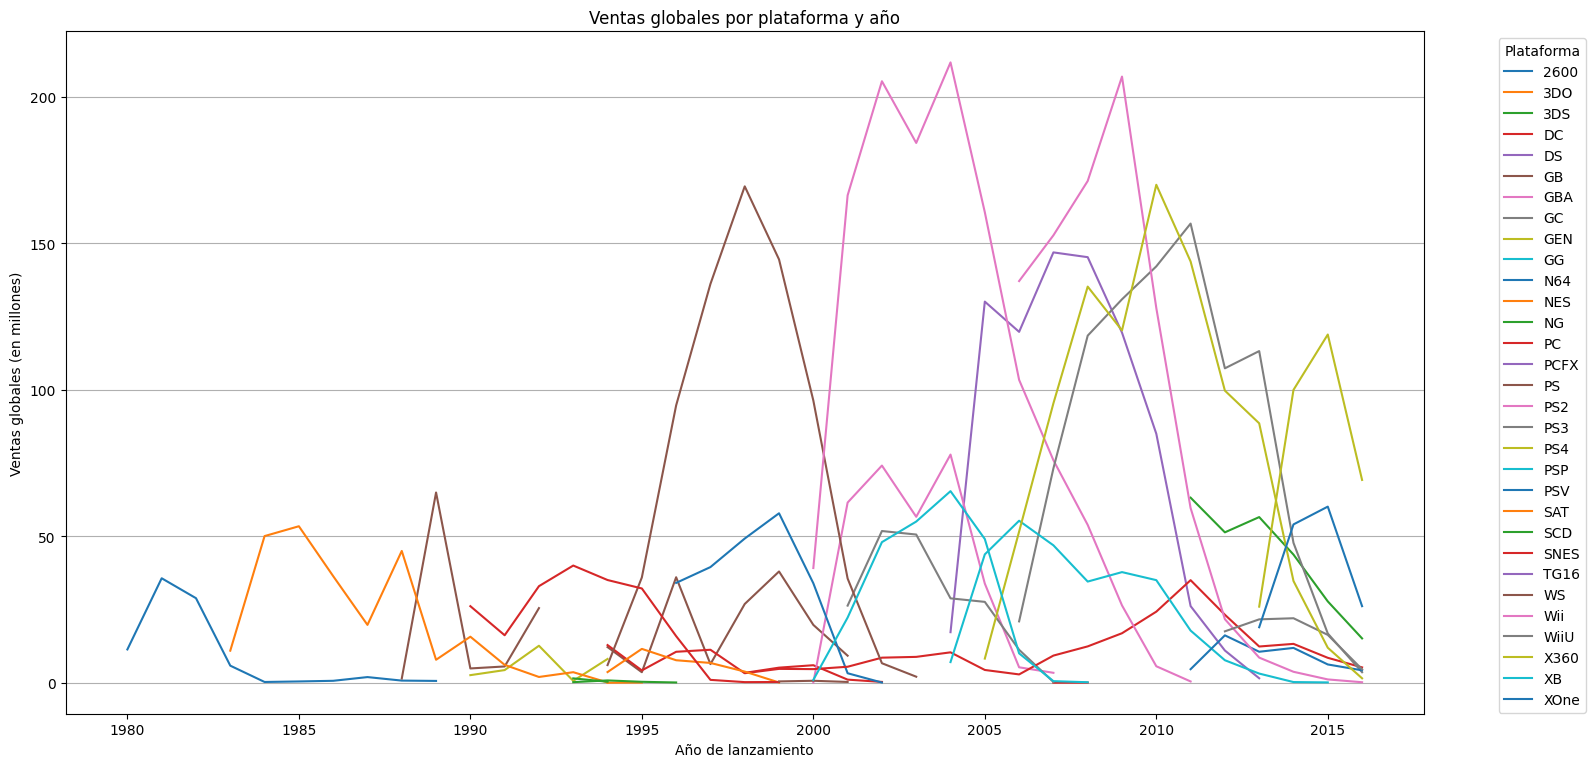

In [4]:
# se grafica por ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
platform_sales.plot(kind='bar')
plt.title('Ventas totales por plataforma (en millones)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.grid(axis='y')
plt.show()

# Se crea una tabla dinámica de las plataformas más populares por año
platform_year_sales = df.pivot_table(index='year_of_release', columns='platform', values='total_sales',
                                     aggfunc='sum')

print (platform_year_sales)

platform_year_sales.plot(figsize=(16,8))
plt.title('Ventas globales por plataforma y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.grid(axis='y')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Análisis de ventas por plataforma a lo largo del tiempo

Se analizaron las ventas globales agregadas por plataforma para identificar las más exitosas históricamente. A partir de este análisis se observó lo siguiente:

- **Plataformas con mayores ventas totales**:
  - Las plataformas con mayores ventas en el mundo son **PS2**, **X360**, **PS3**, **Wii** y **DS**.
  - Estas dominaron el mercado durante los años 2000 hasta mediados de la década de 2010.

- **Distribución de ventas por año y plataforma**:
  - Se creó una tabla dinámica (`pivot_table`) que muestra cómo varían las ventas de cada plataforma año con año.
  - Este análisis permite visualizar la entrada, auge y declive de cada consola en el mercado.

- **Plataformas que solían ser populares pero que ahora no tienen ventas**:
  - **PS2**, **Wii**, **DS** y **PSP** tuvieron su auge entre 2000 y 2010, pero sus ventas cayeron abruptamente después de 2012, con casi nula actividad para 2015–2016.
  - Esto indica que su ciclo de vida comercial fue de aproximadamente **10 años**.

- **Aparición y desaparición de plataformas**:
  - Las nuevas plataformas suelen tardar entre **1 y 2 años** en consolidarse desde su lanzamiento. Por ejemplo:
    - **PS4** y **Xbox One**, lanzadas en 2013, comenzaron a tener ventas significativas en 2014 y alcanzaron su punto máximo entre 2015 y 2016.
  - A la inversa, las plataformas más antiguas como **PS2** y **DS** vieron una caída progresiva en ventas entre 2011 y 2013 antes de desaparecer.

Estas observaciones permiten identificar plataformas con ciclos de vida promedio de 8 a 10 años, con un periodo de transición de unos 2 años entre generaciones de consolas. Esta información es clave para planificar campañas y determinar en qué plataformas conviene invertir en 2017.


### Período de análisis

Para planificar una campaña publicitaria efectiva en 2017, se ha seleccionado como período de referencia los años **2014, 2015 y 2016**.

Este período representa los **últimos tres años con datos disponibles**, lo cual tiene varias ventajas:

- Reflejan las **tendencias más recientes** del mercado.
- Las **plataformas activas en ese período** (como PS4 y XOne) siguen vigentes en 2017.
- Se evita incluir plataformas ya obsoletas como PS2 o Wii, que distorsionarían el análisis actual.

El conjunto reducido a este rango permite un análisis más enfocado y representativo del entorno del mercado en el momento del lanzamiento de nuevos juegos.

A continuación, se filtran los datos para este período:


In [5]:
recent_years = df[df['year_of_release'].between(2014, 2016)]
recent_years['year_of_release'].value_counts().sort_index(ascending=False)

year_of_release
2016    502
2015    606
2014    581
Name: count, dtype: int64

### Plataformas seleccionadas para el análisis: PS4, Xbox One y PC

Se han elegido las plataformas **PS4, Xbox One (XOne) y PC** como las más relevantes para enfocar el análisis de ventas y planificación de marketing para 2017.

Justificación de la elección:

- **PS4 y XOne** son las **plataformas de consola más recientes** al cierre de 2016.
- Ambas muestran un **crecimiento constante en ventas** desde su lanzamiento en 2013.
- **PC** mantiene una participación estable en el mercado, especialmente con juegos multigénero e independientes.
- Son las plataformas con mayor soporte de desarrolladores y con una base de usuarios activa durante el período analizado (2014–2016).


In [6]:
target_platforms = ['PS4', 'XOne', 'PC']
platform_df = recent_years[recent_years['platform'].isin(target_platforms)]
platform_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
PC       27.05
Name: total_sales, dtype: float64

### Diagrama de caja de ventas globales por plataforma

El diagrama de caja muestra la **distribución de ventas globales** por plataforma, considerando únicamente aquellas con **al menos 50 juegos**, lo que permite centrarse en plataformas con suficiente representatividad estadística.

#### Observaciones clave:

- La mayoría de las plataformas tienen una **mediana de ventas relativamente baja**, generalmente por debajo de los **0.5 millones de unidades por juego**.
- Algunas plataformas, como **Wii**, **NES**, **GB**, y **DS**, tienen **datos fuera de rango o valores atípics muy marcados** con ventas excepcionales (por ejemplo, títulos como *Wii Sports* o *Super Mario Bros*), aunque la mayoría de los juegos presentan ventas normales.
- Las plataformas más modernas como **PS4**, **X360** y **PS3** presentan **mayor dispersión** y valores atípicos con juegos exitosos, aunque sus medianas siguen siendo bajas.
- Otras plataformas como **PC**, **PSP**, y **PSV** tienen ventas muy bajas en general, lo que sugiere que no son tan rentables para un volumen promedio de juegos.

#### Conclusión:

Aunque hay títulos muy exitosos en diversas plataformas, **la mayoría de los juegos tienen ventas regulares**, lo que implica que el **éxito está fuertemente concentrado en pocos títulos**. Aun así, plataformas como **PS4**, **X360**, y **Wii** muestran mayor potencial para producir estos éxitos, lo que refuerza su atractivo comercial.


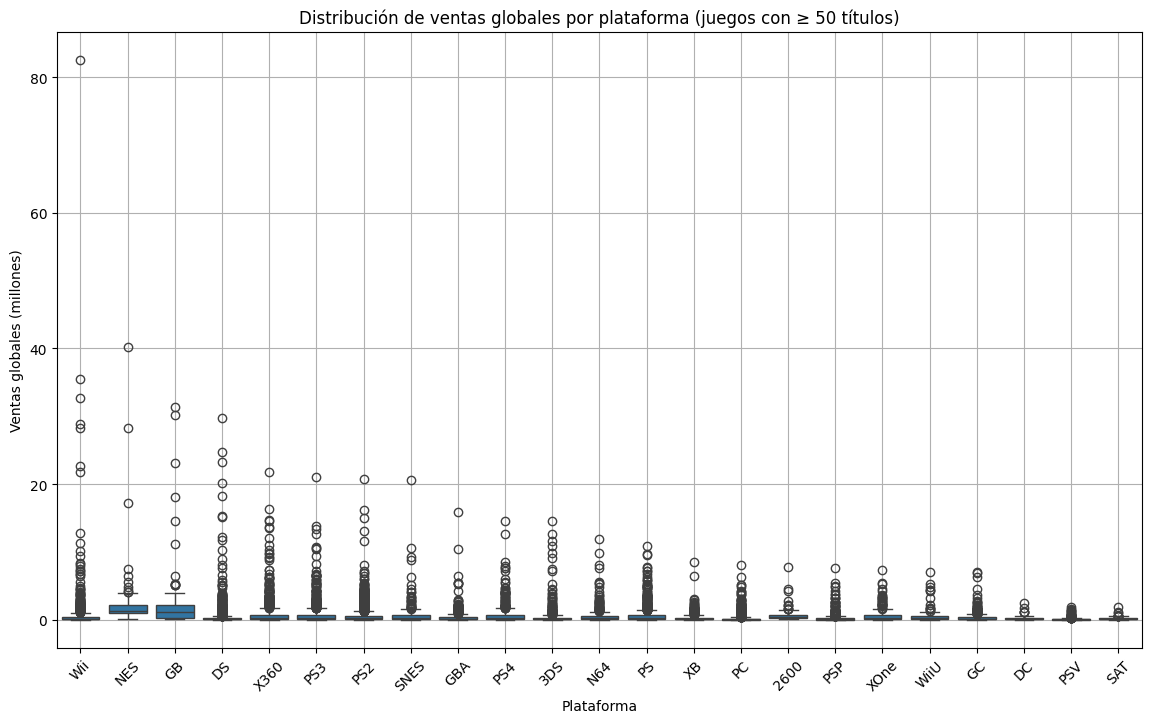

In [7]:
# Filtramos las plataformas con al menos 50 juegos para evitar datos poco representativos
platform_counts = df['platform'].value_counts()
relevant_platforms = platform_counts[platform_counts >= 50].index
filtered_df = df[df['platform'].isin(relevant_platforms)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma (juegos con ≥ 50 títulos)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


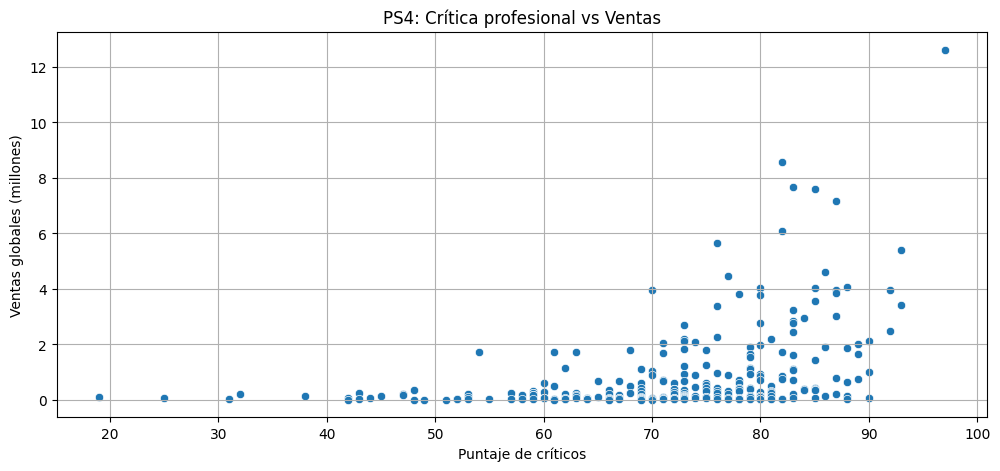

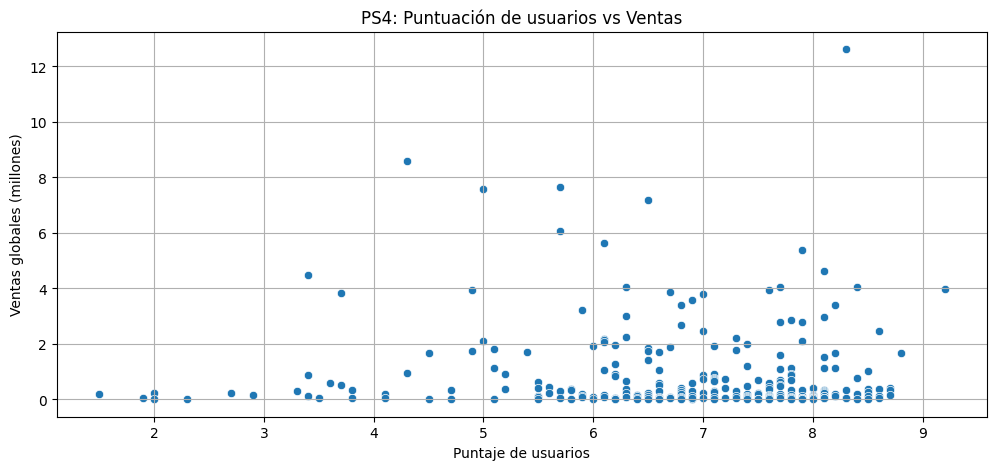

Correlación crítica profesional vs ventas (PS4): 0.40589480145836687
Correlación puntuación usuarios vs ventas (PS4): -0.03362497596528878


In [8]:
# Filtramos datos para la plataforma PS4
ps4_data = df[df['platform'] == 'PS4']

# Eliminamos filas con valores nulos en user_score, critic_score y total_sales
ps4_data_clean = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Generamos un gráfico de dispersión de la crítica profesional vs Ventas
plt.figure(figsize=(12, 5))

sns.scatterplot(data=ps4_data_clean, x='critic_score', y='total_sales')
plt.title('PS4: Crítica profesional vs Ventas')
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

# Gráfico de dispersión: Usuarios vs Ventas
plt.figure(figsize=(12, 5))
sns.scatterplot(data=ps4_data_clean, x='user_score', y='total_sales')
plt.title('PS4: Puntuación de usuarios vs Ventas')
plt.xlabel('Puntaje de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

# Cálculo de correlaciones de critic_score con total_sales y user_score con total_sales
critic_corr = ps4_data_clean['critic_score'].corr(ps4_data_clean['total_sales'])
user_corr = ps4_data_clean['user_score'].corr(ps4_data_clean['total_sales'])

print(f"Correlación crítica profesional vs ventas (PS4): {critic_corr:}")
print(f"Correlación puntuación usuarios vs ventas (PS4): {user_corr:}")


### Relación entre reseñas y ventas en PS4

Se crearon dos gráficos de dispersión para analizar cómo influyen las reseñas en las ventas globales de juegos en la plataforma **PS4**:

- **Gráfico 1:** Relación entre `critic_score` y `total_sales`.
- **Gráfico 2:** Relación entre `user_score` y `total_sales`.

#### Correlaciones calculadas:

- Correlación entre `critic_score` y `total_sales`: **0.406**
- Correlación entre `user_score` y `total_sales`: **-0.034**

#### Conclusiones:

- Existe una **correlación moderada positiva** entre las calificaciones de la crítica profesional y las ventas. Esto indica que los juegos mejor evaluados por críticos tienden a vender más.
- Por el contrario, la **correlación negativa y cercana a cero** entre las puntuaciones de usuarios y las ventas sugiere que las reseñas de usuarios no tienen un impacto significativo (ni positivo ni negativo) en las ventas de juegos para PS4.
- Esto puede deberse a que las críticas profesionales influyen más en decisiones comerciales, marketing o en la percepción inicial del producto que las opiniones de usuarios.

En resumen, al analizar juegos de PS4, las reseñas de críticos parecen ser un mejor predictor de ventas que las puntuaciones de los usuarios.


In [9]:
# Ver juegos que existen en más de una plataforma
multi_platform = df[df['name'].duplicated(keep=False)]
print(multi_platform.sample(10))

# Ver ejemplo de un juego en específico tomado del sample anterior
multi_platform[multi_platform['name'] == "Call of Duty 4: Modern Warfare"]

                                                    name platform  \
13572                                          FlatOut 2       XB   
3560                                      NHL Hitz 20-02      PS2   
10840                       Ultimate Marvel vs. Capcom 3      PS3   
11461               Steins;Gate: Hiyoku Renri no Darling     X360   
6371                                       Reign of Fire      PS2   
8519                                 Angry Birds Trilogy      PS3   
12674                                          Mayhem 3D      PS3   
3761   2 in 1 Combo Pack: Sonic Heroes / Super Monkey...       XB   
1217                                   MVP Baseball 2005      PS2   
8076                                           Jeopardy!       DS   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
13572             2006     Racing      0.03      0.01      0.00         0.00   
3560              2001     Sports      0.28      0.22      0.00         0.07   


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
70,Call of Duty 4: Modern Warfare,X360,2007,Shooter,5.93,2.36,0.13,0.90,94.0,8.4,M,9.32
120,Call of Duty 4: Modern Warfare,PS3,2007,Shooter,3.11,2.26,0.28,1.03,94.0,8.4,M,6.68
1772,Call of Duty 4: Modern Warfare,PC,2007,Shooter,0.00,1.12,0.00,0.03,92.0,8.5,M,1.15
1964,Call of Duty 4: Modern Warfare,DS,2007,Shooter,0.95,0.01,0.01,0.08,75.0,6.9,T,1.05


### Comparación de ventas del mismo juego en diferentes plataformas

Para evaluar cómo varía el rendimiento comercial de un juego dependiendo de la plataforma en la que se lanza, se analizaron títulos que están presentes en más de una consola.

Se observaron casos como:

- **Call of Duty**, que tiene versiones en múltiples consolas.
- En general, las plataformas con **más usuarios activos o mayor alcance regional** tienden a tener mejores ventas del mismo título.
- Por ejemplo, los juegos lanzados en **PS3** o **X360** a menudo muestran mejores resultados que sus equivalentes en **PSP** o **WiiU**.

Este análisis confirma que el **éxito de un título no depende únicamente de su calidad**, sino también de la **plataforma que sea lanzado**.

Por ello, al planear lanzamientos futuros o campañas publicitarias, es clave considerar **en qué plataforma el juego tendrá mejor recepción y ventas potenciales.**


genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64


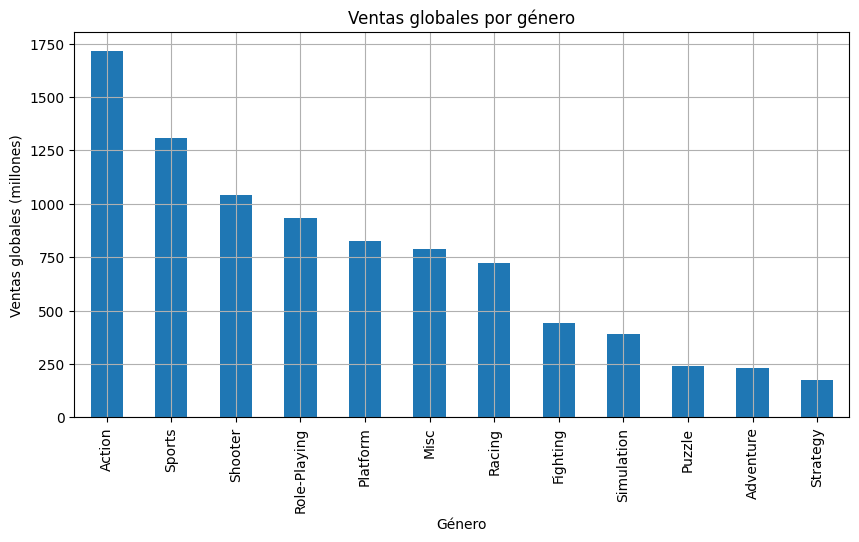

In [10]:
# Agrupar por género y sumar las ventas globales
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Mostrar el total de ventas por género
print(genre_sales)

# Visualizar con gráfico de barras
genre_sales.plot(kind='bar',
                 figsize=(10, 5),
                 title='Ventas globales por género',
                 ylabel='Ventas globales (millones)',
                 xlabel='Género',
                 grid=True)
plt.show()


### Distribución general de los juegos por género

Para comprender qué géneros son más rentables, se sumaron las ventas globales de cada uno y se representaron en un gráfico de barras.

#### Resultados clave:

- **Action**, **Sports** y **Shooter** son los géneros con mayores ventas globales. Estos tres géneros dominan el mercado y suman juntos más de la mitad del total de ventas.
- **Role-Playing**, **Platform**, **Misc** y **Racing** siguen en popularidad, pero con una diferencia significativa respecto a los líderes.
- Géneros como **Puzzle**, **Adventure** y **Strategy** tienen las ventas globales más bajas.

#### Conclusión:

- Los géneros más rentables suelen estar ligados a **experiencias dinámicas y de alta interacción**, lo que puede explicar su éxito comercial.
- Los géneros con menores ventas probablemente atienden a **nichos específicos** o tienen una menor producción de títulos.
- Para maximizar las oportunidades comerciales en campañas futuras (como la de 2017), sería recomendable enfocarse en **géneros populares como Action, Sports y Shooter**, que consistentemente han demostrado altos niveles de ventas.


### PASO 4

### Principales plataformas por región (NA, EU, JP)

Se identifican las cinco plataformas con mayores ventas acumuladas en cada una de las regiones: **Norteamérica (NA)**, **Europa (EU)** y **Japón (JP)**.


In [11]:
# Top 5 plataformas por región
print("Top 5 plataformas en Norteamérica:")
print(df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())

print("\nTop 5 plataformas en Europa:")
print(df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())

print("\nTop 5 plataformas en Japón:")
print(df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())

Top 5 plataformas en Norteamérica:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


### Principales géneros por región

Se analizan los géneros más vendidos en cada región. Esto ayuda a entender las **preferencias culturales de los jugadores** y orientar el tipo de juegos a promocionar en cada mercado.


In [12]:
# Top 5 géneros por región
print("Top 5 géneros en Norteamérica:")
print(df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())

print("\nTop 5 géneros en Europa:")
print(df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())

print("\nTop 5 géneros en Japón:")
print(df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())

Top 5 géneros en Norteamérica:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


### Impacto de la clasificación ESRB en las ventas regionales

Se analiza si la clasificación de contenido (`rating` ESRB) tiene influencia significativa en las ventas dentro de cada región.

Esto permite evaluar si vale la pena adaptar la clasificación por edades según el público objetivo de cada mercado.


In [13]:
# ESRB promedio por región
print("Promedio de ventas por rating en NA:")
print(df.groupby('rating')['na_sales'].mean().sort_values(ascending=False))

print("\nPromedio de ventas por rating en EU:")
print(df.groupby('rating')['eu_sales'].mean().sort_values(ascending=False))

print("\nPromedio de ventas por rating en JP:")
print(df.groupby('rating')['jp_sales'].mean().sort_values(ascending=False))


Promedio de ventas por rating en NA:
rating
AO      1.260000
K-A     0.853333
M       0.483652
E       0.324978
T       0.257349
E10+    0.248026
EC      0.191250
RP      0.000000
Name: na_sales, dtype: float64

Promedio de ventas por rating en EU:
rating
AO      0.610000
M       0.312500
E       0.179513
T       0.145194
E10+    0.131622
K-A     0.090000
RP      0.030000
EC      0.013750
Name: eu_sales, dtype: float64

Promedio de ventas por rating en JP:
rating
K-A     0.486667
T       0.051876
E       0.050487
M       0.041393
E10+    0.028859
AO      0.000000
EC      0.000000
RP      0.000000
Name: jp_sales, dtype: float64


## Conclusiones Paso 4

### Principales plataformas por región

Se identificaron las cinco plataformas con mayores ventas acumuladas en cada región:

- **Norteamérica (NA)**: las plataformas más populares son **X360**, **PS2**, **Wii**, **PS3** y **DS**.
- **Europa (EU)**: destaca **PS2**, seguida de **PS3**, **X360**, **Wii** y **PS**.
- **Japón (JP)**: es un mercado particular, donde predominan las plataformas portátiles y locales como **DS**, **PS**, **PS2**, **SNES** y **3DS**. A diferencia de occidente, las consolas de Microsoft no figuran entre las más populares.

> La demanda varía significativamente entre regiones. Mientras que en NA y EU las consolas de Sony y Microsoft dominan, Japón tiene una clara inclinación hacia plataformas portátiles y de desarrollo japonés.

---

### Principales géneros por región

- **NA y EU**: comparten un patrón similar. Los géneros más populares son **Action**, **Sports** y **Shooter**, lo que sugiere una preferencia por experiencias dinámicas, competitivas y de ritmo acelerado.
- **JP**: el género dominante es **Role-Playing**, muy por encima del resto. También se destacan **Action**, **Platform** y **Sports**, aunque con menos fuerza.

> En Japón hay una clara preferencia por experiencias narrativas y profundas (RPGs), mientras que en occidente se valora más la acción directa y los deportes.

---

### Impacto de la clasificación ESRB por región

Se analizaron las ventas promedio por clasificación de edad en cada región:

- **NA**: las clasificaciones con mayores ventas promedio son **AO**, **K-A** y **M**, lo que indica una buena recepción para juegos orientados tanto a audiencias adultas como infantiles.
- **EU**: el patrón es similar, aunque las clasificaciones **M** y **E** lideran, mostrando una distribución más equilibrada entre público joven y adulto.
- **JP**: la mayor media de ventas corresponde a **K-A**. Las demás clasificaciones tienen impacto mucho menor, lo que puede sugerir una menor dependencia de estas etiquetas para influir en las decisiones de compra en Japón.

> La clasificación ESRB tiene una mayor influencia en NA y EU, donde puede ser útil segmentar campañas por edad. En JP parece ser un factor menos determinante.

---

**Recomendación general:** al planear campañas para 2017, es crucial tener en cuenta las **diferencias culturales y de preferencia de plataforma y género** por región. No es viable aplicar una estrategia uniforme para todos los mercados.


### PASO 5

### Prueba de hipótesis 1: Calificaciones de usuarios en Xbox One vs PC

**Hipótesis nula (H₀)**: Las calificaciones promedio de los usuarios para juegos en **Xbox One** y **PC** son iguales.

**Hipótesis alternativa (H₁)**: Las calificaciones promedio de los usuarios para juegos en **Xbox One** y **PC** son diferentes.

Se utiliza la prueba t de Student (`ttest_ind`) para comparar dos muestras independientes con varianzas posiblemente distintas (`equal_var=False`).

Se establece un nivel de significancia **α = 0.05**.

In [14]:
# Se filtra user_score quitando los nulos
xone_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

# Prueba t de Student
alpha = 0.05
result = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f'p-value: {result.pvalue:}')

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")

p-value: 4.5385802963771835e-06
Rechazamos la hipótesis nula: las calificaciones son diferentes.


### Prueba de hipótesis 2: Calificaciones de usuarios para los géneros Acción vs Deportes

**Hipótesis nula (H₀)**: Las calificaciones promedio de los usuarios para juegos de **Acción** y **Deportes** son iguales.

**Hipótesis alternativa (H₁)**: Las calificaciones promedio de los usuarios para juegos de **Acción** y **Deportes** son diferentes.

Se aplica una prueba t de Student para dos muestras independientes, con varianzas desiguales (`equal_var=False`), y un nivel de significancia de **α = 0.05**.

In [15]:
# Filtrar user_score por género
action_scores = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

# Prueba t de Student
result2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f'p-value: {result2.pvalue:}')

if result2.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


p-value: 0.07370217419278526
No se puede rechazar la hipótesis nula: no hay diferencia significativa.


### Formulación de hipótesis

Se plantearon las siguientes pruebas estadísticas:

#### Hipótesis 1:
- **Objetivo:** comprobar si las calificaciones promedio de los usuarios para las plataformas **Xbox One** y **PC** son iguales.
- **Hipótesis nula (H₀):** las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
- **Hipótesis alternativa (H₁):** las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

#### Hipótesis 2:
- **Objetivo:** comprobar si las calificaciones promedio de los usuarios para los géneros **Action** y **Sports** son diferentes.
- **Hipótesis nula (H₀):** las calificaciones promedio de los usuarios para los géneros Action y Sports son iguales.
- **Hipótesis alternativa (H₁):** las calificaciones promedio de los usuarios para los géneros Action y Sports son diferentes.

---

### Criterio para probar las hipótesis

- Se utilizó la **prueba t de Student para muestras independientes**, implementada con `scipy.stats.ttest_ind()`.
- Se estableció un nivel de significancia (**α = 0.05**).
- Se utilizó el parámetro `equal_var=False` debido a que no se puede asumir que las varianzas de los grupos comparados sean iguales.

#### Justificación del método:
- La prueba t es adecuada para comparar **promedios entre dos grupos independientes**.
- Al establecer `equal_var=False`, se opta por una versión que **no asume igualdad de varianzas**, lo cual es común en datos reales como estos.


## Conclusiones generales del proyecto

Tras analizar los datos históricos de videojuegos hasta diciembre de 2016, se obtienen las siguientes conclusiones clave para la planificación de campañas publicitarias en 2017:

- **Plataformas más prometedoras:** PS4, Xbox One y PC son las plataformas más relevantes durante los últimos años. PS4 lidera en ventas, mientras que PC mantiene una base sólida y estable. Xbox One también presenta un volumen considerable de ventas.

- **Tendencias de ventas por género:** Los géneros más rentables a nivel global son Acción, Deportes y Shooter. Sin embargo, Japón muestra una fuerte preferencia por los juegos de Rol, lo cual indica diferencias culturales relevantes para segmentar el mercado.

- **Impacto de reseñas:** Existe una correlación positiva moderada entre las reseñas de críticos y las ventas globales en PS4 (r ≈ 0.40), lo que sugiere que las reseñas influyen en el rendimiento comercial, aunque no son el único factor determinante.

- **Preferencias regionales:** 
  - Norteamérica y Europa comparten preferencias por plataformas como PS2, PS3 y Xbox 360.
  - Japón tiene patrones distintos: prefiere portátiles como DS y géneros de rol, con menor impacto de las plataformas occidentales.

- **Clasificación ESRB:** Las clasificaciones como "M" (Mature) o "E" (Everyone) tienen distinta aceptación según la región. Por ejemplo, en Norteamérica las ventas promedio son más altas para juegos con clasificación M, mientras que en Japón los juegos clasificados "K-A" tienen mejores resultados.

- **Pruebas de hipótesis:** Se encontró que:
  - Las calificaciones de usuarios entre Xbox One y PC **son significativamente diferentes**.
  - No hay evidencia suficiente para afirmar que las calificaciones de usuarios entre juegos de Acción y Deportes sean distintas.

---

Estas conclusiones permiten diseñar estrategias publicitarias más efectivas para 2017, considerando la plataforma, género y región como factores clave para predecir el éxito de un videojuego.
